In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad, Compose
from torchvision.utils import make_grid
from core.utils.CNN_scorers import resize_and_pad_tsr

In [3]:
# set variabels
pd_key="expriment_meta_data_df"
proc_data_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\compair_different_nets"
rawdata_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\compair_different_nets\different_nets_experiment_090523"
save_root = os.path.join(proc_data_root, "results")
os.makedirs(save_root, exist_ok=True)

In [4]:
# metadata loading
''''
data_path = os.path.join(proc_data_root, "different_nets_experiment_preprocessed", "metadata_dfs") 
meta_data_df = pd.DataFrame()
for file in os.listdir(data_path):
    if file.endswith(".h5"):
        metadata_df = pd.read_hdf(os.path.join(data_path, file), key=pd_key)
        # each file is saved with the name of the data folder with a suffix of a random number at the end of the name taht
        # splited with "_" so we want to extract the data folder name from the file name and add it as a column to the metadata data frame
        folder_name = file.split("_")[2]
        for si in file.split("_")[3:-1]:
            folder_name = folder_name +("_"+si)

        metadata_df["data_root"] = os.path.join(rawdata_root, folder_name)
        # print humner of repited index in the metadata data frame
        meta_data_df = pd.concat([meta_data_df, metadata_df], axis=0)
concated_df_path = os.path.join(proc_data_root, "metadata_dfs_preprocessed_concated")
os.makedirs(concated_df_path, exist_ok=True)
meta_data_df.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)
'''
concated_df_path = os.path.join(proc_data_root, "metadata_dfs_preprocessed_concated")
metadata_df_cosine = pd.read_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)

In [ ]:
metadata_df_cosine.head(5)

In [ ]:
metadata_df_cosine.iloc[1]

In [ ]:
# inter-layer sampling, caompaire random and most seleccion for each layer
metric_name_list = ["MSE", "cosine"]
perceptual_similarity = "sim_index_l2"#sim_index_l1

expriment_meta_data_df_post_hock = metadata_df_cosine.copy()
layer_short_list = ["layer1", "layer2", "layer3", "layer4"]
net_name = "resnet50_linf_8"

layer_short_list = ["conv5", "conv4", "conv3", "conv2"]
net_name = "alexnet"

#layer_short_list = ["v1", "v2", "v4", "IT"]
# net_name = "cornet_s"
# set font size
title_font_size = 40
axis_font_size = 32
tick_font_size = 25

for j, layer_short in enumerate(layer_short_list):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for i, metric_name in enumerate(metric_name_list):

        for sub_pop_type in ["random", "most"]: 
    # do the mean and sem by negleting np.nan values
            if sub_pop_type == "random":
                mean_result =  expriment_meta_data_df_post_hock[(expriment_meta_data_df_post_hock["output_type"] == "best_gen_imgs_RF_masked") & \
                                                        (expriment_meta_data_df_post_hock["similarity_metric"]==metric_name) & (
                                                            expriment_meta_data_df_post_hock["layer_short"]==layer_short) & (
                                                            expriment_meta_data_df_post_hock["sub_pop_type"] == sub_pop_type)& (
                                                            expriment_meta_data_df_post_hock["net_name"] == net_name)].groupby([
                                                                "trget_imge_name", "pop_size", "pop_resampling_id"])[perceptual_similarity].mean().reset_index().groupby(
                                                                    "pop_size")[perceptual_similarity].mean()
                std_result = expriment_meta_data_df_post_hock[(expriment_meta_data_df_post_hock["output_type"] == "best_gen_imgs_RF_masked") & \
                                                        (expriment_meta_data_df_post_hock["similarity_metric"]==metric_name) & (
                                                            expriment_meta_data_df_post_hock["layer_short"]==layer_short) & (
                                                            expriment_meta_data_df_post_hock["sub_pop_type"] == sub_pop_type)& (
                                                            expriment_meta_data_df_post_hock["net_name"] == net_name)].groupby([
                                                            "trget_imge_name", "pop_size", "pop_resampling_id"])[perceptual_similarity].mean().reset_index().groupby(
                                                                "pop_size")[perceptual_similarity].sem()
                line_color = 'black'
                shade_color = 'lightgray'
                lable = "random"
            if sub_pop_type == "most":
                mean_result = expriment_meta_data_df_post_hock[(expriment_meta_data_df_post_hock["output_type"] == "best_gen_imgs_RF_masked") & \
                                                (expriment_meta_data_df_post_hock["similarity_metric"]==metric_name) & (
                                                    expriment_meta_data_df_post_hock["layer_short"]==layer_short) & (
                                                    expriment_meta_data_df_post_hock["sub_pop_type"] == sub_pop_type)& (
                                                    expriment_meta_data_df_post_hock["net_name"] == net_name)].groupby([
                                                        "trget_imge_name", "pop_size"])[perceptual_similarity].mean().reset_index().groupby(
                                                            "pop_size")[perceptual_similarity].mean()
                std_result = expriment_meta_data_df_post_hock[(expriment_meta_data_df_post_hock["output_type"] == "best_gen_imgs_RF_masked") & \
                                                        (expriment_meta_data_df_post_hock["similarity_metric"]==metric_name) & (
                                                        expriment_meta_data_df_post_hock["layer_short"]==layer_short) & (
                                                        expriment_meta_data_df_post_hock["sub_pop_type"] == sub_pop_type)& (
                                                        expriment_meta_data_df_post_hock["net_name"] == net_name)].groupby([
                                                            "trget_imge_name", "pop_size"])[perceptual_similarity].mean().reset_index().groupby(
                                                                "pop_size")[perceptual_similarity].sem()
                line_color = 'blue'
                shade_color = 'lightblue'
                lable = "most active "
            mean_result_index  = mean_result.index
            mean_result  = mean_result.values
            std_result = std_result.values


            if layer_short == "conv5432":
                 mean_result_index = mean_result_index * 4
            if layer_short == "conv53":
                 mean_result_index = mean_result_index * 2

            # plot the results using subplots and erorbar and conected dot and log 2 scale for the x axis and make the coloe of bars similar to the color of the line
            ax[i].plot(mean_result_index, mean_result, '--', color=line_color, label=lable, linewidth=3)
            ax[i].fill_between(mean_result_index, mean_result-std_result, mean_result+std_result,
                                color=shade_color, alpha=0.5, label='')
        ## add grid
        ax[i].grid(True, which='both', axis='both', alpha=0.3)

        ax[i].set_xscale('log', base=2)

        ax[i].set_title(f"{metric_name}", fontsize=title_font_size, fontweight='bold')

    # get y lims for all the subplots
    y_lims = [ax[i].get_ylim() for i in range(len(ax))]
    # define the y lim that cincludes all the subplots y lims
    y_lim = [min([y_lims[i][0] for i in range(len(ax))]), max([y_lims[i][1] for i in range(len(ax))])]
    
    if perceptual_similarity == 'l2_distance':
            ax[0].set_ylabel(f"l2 distance", fontsize=axis_font_size)
    if perceptual_similarity == 'pixel_dist_normalized':
            ax[0].set_ylabel(f"similarity index", fontsize=axis_font_size)
    else:
        ax[0].set_ylabel(f"similarity index", fontsize=axis_font_size)
    ax[1].set_xlabel("Population size", fontsize=32)    
    # add legend to as layers names to the second subplot outside the plot        
    ax[1].legend( loc='upper right', bbox_to_anchor=(2.2, 1), fontsize=axis_font_size)
    # set the y lim for all the subplots
    for i in range(len(ax)):
        ax[i].set_ylim(y_lim)
        # make Y-tiks nicer 
        #ax[i].set_yticks(np.round(np.arange(min(y_lim), max(y_lim), round((max(y_lim)-min(y_lim))/4, 2)),2))
        #ax[i].set_yticks([0, .15, .3])
        ax[i].set_xlim([2**0-.3, 2**10])
        # increase the font size of the y  and x ticks
        ax[i].tick_params(axis='y', which='major', labelsize=tick_font_size)
        ax[i].tick_params(axis='x', which='major', labelsize=tick_font_size)
    # remove the tick labels from the second subplot
    ax[1].set_yticklabels([])
    # set title for the whole figure
    #fig.suptitle(f"{net_name} {layer_short}", fontsize=title_font_size, fontweight='bold')
    # ser tight layout
    plt.tight_layout()

    # set title for the whole figure
    save_path = os.path.join(save_root,net_name, f"{perceptual_similarity}_vx_pop_size_random_vs_most")
    os.makedirs(save_path, exist_ok=True)

    plt.savefig(os.path.join(save_path, f"{layer_short}.png"), bbox_inches="tight", pad_inches=0)
    plt.savefig(os.path.join(save_path, f"{layer_short}.pdf"), bbox_inches="tight", pad_inches=0, dpi=300)

In [5]:
# module to get the target actmap
from core.utils.CNN_scorers import TorchScorer
from core.utils.func_lib import *

def get_net_encoding(refimgdir, net_name, layer_names, pading_size= (40, 40), img_size= (147, 147)):
        refimgname, refimgtsr = load_ref_imgs(
                imgdir=refimgdir, preprocess_type='center_crop', image_size=227)
        scorer = TorchScorer(net_name)
        unit_mask_dict, unit_tsridx_dict = set_all_center_unit_population_recording(scorer, layer_names)
        resf_images_actmat, _ = encode_image(scorer, refimgtsr, key=layer_names,
                                        RFresize=True, corner=pading_size, imgsize=img_size)
        return resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname

def get_poap_act_map(all_act_map, idxs, poap_idxs, all_mean=None, all_std=None):
        poap_act_map = []
        poap_mean = []
        poap_std = []
        for i in range(len(idxs)):
                if idxs[i] in poap_idxs:
                        poap_act_map.append(all_act_map[i])
                        if all_mean is not None:
                                poap_mean.append(all_mean[i])
                        if all_std is not None:
                                poap_std.append(all_std[i])
        return np.array(poap_act_map), np.array(poap_mean), np.array(poap_std)


In [58]:
# set font size
title_font_size = 40
axis_font_size = 32
tick_font_size = 25
legend_font_size = 25

layer_short = "conv5"
sampling_type = "random"
net_name = "alexnet"
pop_size_list = [2048, 512, 128, 32, 8]
pop_size = 256
num_of_pop_resampling = metadata_df_cosine["pop_resampling_id"].max()+1
num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
col_name= "score"
save_path_root = os.path.join(save_root, f"matching_improvment")

similarity_metric = "MSE"
sub_df = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["layer_short"]==layer_short) & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["pop_size"] == pop_size) & (
                                metadata_df_cosine["net_name"] == net_name)]
gen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()
pop_resampling_id_max = metadata_df_cosine["pop_resampling_id"].max()
image_name_list = sub_df["trget_imge_name"].unique()
# get target images encoding
layer_name = sub_df.iloc[0]['layer_name']
refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

inital_score_list_mean = list()
inital_score_list_sem = list()
last_score_list_mean = list()
last_score_list_sem = list()

for image_name in image_name_list:
    # load the target image
    target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
    image_inital_score_list_mean = list()
    image_inital_score_list_sem = list()
    image_last_score_list_mean = list()
    image_last_score_list_sem = list()
    for pop_resampling_id in range(pop_resampling_id_max+1):

        for gen_rerun_id in range(gen_rerun_id_max+1):
            eveol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                            output_type='generation_data', pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                            pop_resampling_id=pop_resampling_id, net_name=net_name)
            actmat_all = eveol_data['actmat_all']
            scores_all = eveol_data['scores_all']
            generations = eveol_data['generations']
            init_scorre = scores_all[generations == 1]
            last_scorre = scores_all[generations == generations.max()] 
            image_inital_score_list_mean.append(init_scorre.mean())
            image_inital_score_list_sem.append(init_scorre.std()/np.sqrt(len(init_scorre)))
            image_last_score_list_mean.append(last_scorre.mean())
            image_last_score_list_sem.append(last_scorre.std()/np.sqrt(len(last_scorre)))
    inital_score_list_mean.append(np.mean(image_inital_score_list_mean))
    inital_score_list_sem.append(np.std(image_inital_score_list_mean)/np.sqrt(len(image_inital_score_list_mean)))
    last_score_list_mean.append(np.mean(image_last_score_list_mean))
    last_score_list_sem.append(np.std(image_last_score_list_sem)/np.sqrt(len(image_last_score_list_sem)))




c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer .features.Conv2d10 center units from feature tensor of shape (256, 13, 13)


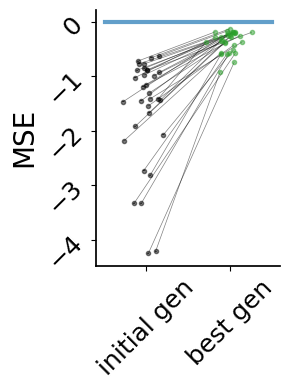

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
x_for_inital = np.random.normal(1, 0.1, len(inital_score_list_mean))
x_for_best = np.random.normal(2, 0.1, len(last_score_list_mean))
colors = sns.color_palette("tab10", 4)
# eror bar with very small bots
ax.errorbar(x_for_inital,  inital_score_list_mean , yerr=inital_score_list_sem, fmt='.', label='inital gen', color='k', alpha=0.5)
ax.errorbar(x_for_best, last_score_list_mean, yerr=last_score_list_sem, fmt='.', label='best gen', color=colors[2], alpha=0.5)
for i in range(len(inital_score_list_mean)):
        ax.plot([x_for_inital[i], x_for_best[i]], [inital_score_list_mean[i], last_score_list_mean[i]],  color='k', alpha=0.5, linewidth=.5)

# ad a horzentral tick line at zero        

ax.plot([.5, 2.5], [0, 0], alpha=0.7, linewidth=3, color=colors[0])
ax.set_xticks([1, 2], ['initial gen', 'best gen'])
ax.tick_params(axis='both', which='major', labelsize=18)
# let add the axis labels 
font_size = 20
ax.set_ylabel('MSE', fontsize=font_size)
# just keep 5 vales for both x and y ticks
ax.locator_params(nbins=5)
# change both axix line whidth to 1.25
ax.spines['bottom'].set_linewidth(1.25)
ax.spines['left'].set_linewidth(1.25)
# rotate the x ticks and y ticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
save_path = r'C:\Users\Alireza\OneDrive - Harvard University\slides\Pizza_talk_2024\figures'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, f"{layer_short}_inital_vs_best_gen.png"), bbox_inches="tight", dpi=300)



In [ ]:
# set font size
title_font_size = 40
axis_font_size = 32
tick_font_size = 25
legend_font_size = 25

layer_short = "layer4"
sampling_type = "random"
net_name = "resnet50"
pop_size_list = [2048, 512, 128, 32, 8]
pop_size = 512
num_of_pop_resampling = metadata_df_cosine["pop_resampling_id"].max()+1
num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
col_name= "score"
save_path_root = os.path.join(save_root, f"matching_improvment")

similarity_metric = "cosine"
sub_df = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["layer_short"]==layer_short) & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["pop_size"] == pop_size) & (
                                metadata_df_cosine["net_name"] == net_name)]
gen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()
pop_resampling_id_max = metadata_df_cosine["pop_resampling_id"].max()
image_name_list = sub_df["trget_imge_name"].unique()
# get target images encoding
layer_name = sub_df.iloc[0]['layer_name']
refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

cosine_inital_score_list = []
cosine_last_gen_mse_score_list = []
for image_name in image_name_list:
    # load the target image
    target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
    for pop_resampling_id in range(pop_resampling_id_max+1):
        poap_idx = sub_df[(sub_df['trget_imge_name']== image_name)&(
            sub_df["pop_resampling_id"] == pop_resampling_id)&(
            sub_df["gen_rerun_id"]==0)&(
            sub_df["output_type"]=="best_gen_imgs_RF_masked")].iloc[0]["pop_unit_idx"][layer_name[0]]
        poap_act_map_to_target, poap_mean, poap_std = get_poap_act_map(resf_images_actmat[target_img_idx][0], 
                                        unit_mask_dict[layer_name[0]], poap_idx, popul_m[0], popul_s[0])
        for gen_rerun_id in range(gen_rerun_id_max+1):
            eveol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                            output_type='generation_data', pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                            pop_resampling_id=pop_resampling_id, net_name=net_name)
            actmat_all = eveol_data['actmat_all']
            scores_all = eveol_data['scores_all']
            generations = eveol_data['generations']
            init_scorre = scores_all[generations == 1]
            last_gen_act_map = actmat_all[np.argmax(scores_all)]

            poap_act_map_to_target_norm = (poap_act_map_to_target - poap_mean) / poap_std
            last_gen_act_map_norm = (last_gen_act_map - poap_mean) / poap_std
            mse_scores = -np.square(poap_act_map_to_target_norm - last_gen_act_map_norm).mean()
            # best geen code
            cosine_inital_score_list.append(init_scorre)
            cosine_last_gen_mse_score_list.append(mse_scores)

In [6]:
# show that MSE dose not work weel in last layers of resnet50
title_font_size = 40
axis_font_size = 32
tick_font_size = 25
legend_font_size = 25

layer_short = "layer4"
sampling_type = "random"
net_name = "resnet50"
pop_size_list = [2048, 512, 128, 32, 8]
pop_size = 512
num_of_pop_resampling = metadata_df_cosine["pop_resampling_id"].max()+1
num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
col_name= "score"
save_path_root = os.path.join(save_root, f"matching_improvment")
similarity_metric = "MSE"
os.makedirs(save_path_root, exist_ok=True)
sub_df = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["layer_short"]==layer_short) & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["pop_size"] == pop_size) & (
                                metadata_df_cosine["net_name"] == net_name)]

image_name_list = sub_df["trget_imge_name"].unique()


# do the mean and sem by negleting np.nan values
mean_score_g1 =  sub_df.groupby(["trget_imge_name", 'pop_resampling_id', 'gen_rerun_id'])[col_name].mean().reset_index()
MSE_score_mean = mean_score_g1.groupby(['pop_resampling_id', "trget_imge_name"])[col_name].mean()
MSE_score_std = mean_score_g1.groupby([ 'pop_resampling_id', "trget_imge_name"])[col_name].std()

gen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()
pop_resampling_id_max = metadata_df_cosine["pop_resampling_id"].max()
MSE_inital_score_list = []
for image_name in image_name_list:
    for gen_rerun_id in range(gen_rerun_id_max+1):
        for pop_resampling_id in range(pop_resampling_id_max+1):
            eveol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                            output_type='generation_data', pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                            pop_resampling_id=pop_resampling_id, net_name=net_name)
            actmat_all = eveol_data['actmat_all']
            scores_all = eveol_data['scores_all']
            generations = eveol_data['generations']
            init_scorre = scores_all[generations == 1]
            MSE_inital_score_list.append(init_scorre)
MSE_inital_score_list = np.concatenate(MSE_inital_score_list)

similarity_metric = "cosine"
sub_df = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["layer_short"]==layer_short) & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["pop_size"] == pop_size) & (
                                metadata_df_cosine["net_name"] == net_name)]
gen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()
pop_resampling_id_max = metadata_df_cosine["pop_resampling_id"].max()
image_name_list = sub_df["trget_imge_name"].unique()
# get target images encoding
layer_name = sub_df.iloc[0]['layer_name']
refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

cosine_inital_score_list = []
cosine_last_gen_mse_mean_list = []
cosine_last_gen_std_mean_list = []
for image_name in image_name_list:
    # load the target image
    target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
    for pop_resampling_id in range(pop_resampling_id_max+1):
        poap_idx = sub_df[(sub_df['trget_imge_name']== image_name)&(
            sub_df["pop_resampling_id"] == pop_resampling_id)&(
            sub_df["gen_rerun_id"]==0)&(
            sub_df["output_type"]=="best_gen_imgs_RF_masked")].iloc[0]["pop_unit_idx"][layer_name[0]]
        poap_act_map_to_target, poap_mean, poap_std = get_poap_act_map(resf_images_actmat[target_img_idx][0], 
                                        unit_mask_dict[layer_name[0]], poap_idx, popul_m[0], popul_s[0])
        cosine_last_gen_mse_one_poap = []
        for gen_rerun_id in range(gen_rerun_id_max+1):
            eveol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                            output_type='generation_data', pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                            pop_resampling_id=pop_resampling_id, net_name=net_name)
            actmat_all = eveol_data['actmat_all']
            scores_all = eveol_data['scores_all']
            generations = eveol_data['generations']
            init_scorre = scores_all[generations == 1]
            last_gen_act_map = actmat_all[np.argmax(scores_all)]

            poap_act_map_to_target_norm = (poap_act_map_to_target - poap_mean) / poap_std
            last_gen_act_map_norm = (last_gen_act_map - poap_mean) / poap_std
            mse_scores = -np.square(poap_act_map_to_target_norm - last_gen_act_map_norm).mean()
            # best geen code
            cosine_inital_score_list.append(init_scorre)
            cosine_last_gen_mse_one_poap.append(mse_scores)
        cosine_last_gen_mse_mean_list.append(np.mean(cosine_last_gen_mse_one_poap))
        cosine_last_gen_std_mean_list.append(np.std(cosine_last_gen_mse_one_poap))
cosine_inital_score_list = np.concatenate(cosine_inital_score_list)
            
fig, ax = plt.subplots(1,2, figsize=(8, 4))
#x_jitter = np.random.randn(0, 13, len(score_mean))
x_jitter = np.random.random(len(MSE_score_mean))*7
ax[0].errorbar(x_jitter, MSE_score_mean, yerr=MSE_score_std, color='gray', capsize=1, ls='none', label=None, alpha=0.8)
ax[0].scatter(x_jitter, MSE_score_mean, marker='o', color='blue', label=None, s=8)
ax[1].errorbar(x_jitter, cosine_last_gen_mse_mean_list, yerr=cosine_last_gen_std_mean_list,
                color='gray', capsize=1, ls='none', label=None, alpha=0.8)
ax[1].scatter(x_jitter, cosine_last_gen_mse_mean_list, marker='o', color='blue', label=None, s=8)
# add a band for the initial score (mean +- std)
for i in range(len(ax)):
    ax[i].fill_between([0, 7], [np.mean(MSE_inital_score_list)-np.std(MSE_inital_score_list)]*2, [np.mean(MSE_inital_score_list)+np.std(MSE_inital_score_list)]*2, color='gray', alpha=0.3)
    # remove the xaixs
    ax[i].set_xticks([])
    ax[i].set_ylim([-3, 0])
ax[0].set_ylabel("MSE", fontsize=axis_font_size)
ax[0].set_yticks([])
#ax.set_yticks([-150, -100, -50, 0])
#ax.set_yticklabels([-150, -100, -50, 0], fontsize=tick_font_size, rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(save_path_root, f"score_scater_{layer_short}_{similarity_metric}_{sampling_type}_{pop_size}.pdf"), dpi=300)


KeyboardInterrupt: 

In [40]:
# let calculate the MSE distance for all cosin evelotion
# first get all cosine evelotions rows indexes 
similarity_metric = "cosine"
sampling_type = "random"
out_file_type = "generation_data"
net_name = "resnet50"
layer_name =  ['.layer4.2.BatchNorm2dbn3']
layer_short = "layer4"
selected_indexes = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["output_type"]=='generation_data') & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type) & (
                                metadata_df_cosine["net_name"] == net_name) &(
                                metadata_df_cosine["layer_short"] == layer_short)].index

refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

for index in selected_indexes:
    row = metadata_df_cosine.loc[index]
    if len(row.shape) == 1:
        image_name = row.trget_imge_name
        target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
        poap_idx = row.pop_unit_idx[layer_name[0]]
        poap_act_map_to_target, poap_mean, poap_std = get_poap_act_map(resf_images_actmat[target_img_idx][0], 
                                            unit_mask_dict[layer_name[0]], poap_idx, popul_m[0], popul_s[0])
        
        data_root = row.data_root
        npz_path = glob.glob(os.path.join(data_root, f"{index}.npz"))[0]
        eveol_data = np.load(npz_path)
        actmat_all = eveol_data['actmat_all']
        scores_all = eveol_data['scores_all']
        generations = eveol_data['generations']
        init_scorre = scores_all[generations == 1]
        last_gen_act_map = actmat_all[np.argmax(scores_all)]

        poap_act_map_to_target_norm = (poap_act_map_to_target - poap_mean) / poap_std
        last_gen_act_map_norm = (last_gen_act_map - poap_mean) / poap_std
        mse_scores = -np.square(poap_act_map_to_target_norm - last_gen_act_map_norm).mean()
        metadata_df_cosine.loc[index, "MSE_post"] = mse_scores
    else:
        print("more than one row!")
#metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)
print("resnet50 layer4 random MSE done")

net_name = "resnet50_linf_8"
layer_name =  ['.layer4.2.BatchNorm2dbn3']
layer_short = "layer4"
selected_indexes = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["output_type"]=='generation_data') & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type) & (
                                metadata_df_cosine["net_name"] == net_name) &(
                                metadata_df_cosine["layer_short"] == layer_short)].index

refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

for index in selected_indexes:
    row = metadata_df_cosine.loc[index]
    if len(row.shape) == 1:
        image_name = row.trget_imge_name
        target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
        poap_idx = row.pop_unit_idx[layer_name[0]]
        poap_act_map_to_target, poap_mean, poap_std = get_poap_act_map(resf_images_actmat[target_img_idx][0], 
                                            unit_mask_dict[layer_name[0]], poap_idx, popul_m[0], popul_s[0])
        
        data_root = row.data_root
        npz_path = glob.glob(os.path.join(data_root, f"{index}.npz"))[0]
        eveol_data = np.load(npz_path)
        actmat_all = eveol_data['actmat_all']
        scores_all = eveol_data['scores_all']
        generations = eveol_data['generations']
        init_scorre = scores_all[generations == 1]
        last_gen_act_map = actmat_all[np.argmax(scores_all)]

        poap_act_map_to_target_norm = (poap_act_map_to_target - poap_mean) / poap_std
        last_gen_act_map_norm = (last_gen_act_map - poap_mean) / poap_std
        mse_scores = -np.square(poap_act_map_to_target_norm - last_gen_act_map_norm).mean()
        metadata_df_cosine.loc[index, "MSE_post"] = mse_scores
    else:
        print("more than one row!")
#metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)
print("resnet50_linf_8 layer4 random MSE done")

net_name = "alexnet"
layer_name =  ['.features.Conv2d10']
layer_short = "conv5"
selected_indexes = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["output_type"]=='generation_data') & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type) & (
                                metadata_df_cosine["net_name"] == net_name) &(
                                metadata_df_cosine["layer_short"] == layer_short)].index

refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

for index in selected_indexes:
    row = metadata_df_cosine.loc[index]
    if len(row.shape) == 1:
        image_name = row.trget_imge_name
        target_img_idx = [i for i, s in enumerate(refimgname) if image_name in s]
        poap_idx = row.pop_unit_idx[layer_name[0]]
        poap_act_map_to_target, poap_mean, poap_std = get_poap_act_map(resf_images_actmat[target_img_idx][0], 
                                            unit_mask_dict[layer_name[0]], poap_idx, popul_m[0], popul_s[0])
        
        data_root = row.data_root
        npz_path = glob.glob(os.path.join(data_root, f"{index}.npz"))[0]
        eveol_data = np.load(npz_path)
        actmat_all = eveol_data['actmat_all']
        scores_all = eveol_data['scores_all']
        generations = eveol_data['generations']
        init_scorre = scores_all[generations == 1]
        last_gen_act_map = actmat_all[np.argmax(scores_all)]

        poap_act_map_to_target_norm = (poap_act_map_to_target - poap_mean) / poap_std
        last_gen_act_map_norm = (last_gen_act_map - poap_mean) / poap_std
        mse_scores = -np.square(poap_act_map_to_target_norm - last_gen_act_map_norm).mean()
        metadata_df_cosine.loc[index, "MSE_post"] = mse_scores
    else:
        print("more than one row!")
#metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)
print("alexnet conv5 random MSE done")


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


use the default resnet50 weights
Layer .layer4.2.BatchNorm2dbn3 center units from feature tensor of shape (2048, 8, 8)
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!


C:\Users\Alireza\AppData\Local\Temp\ipykernel_6468\963322176.py:43: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['output_type', 'trget_imge_name', 'similarity_metric', 'gan_name',
       'layer_name', 'layer_short', 'net_name', 'img_size', 'pading_size',
       'input_size', 'pop_unit_idx', 'sub_pop_type', 'gen_rerun_id',
       'data_root'],
      dtype='object')]

  metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)


resnet50 layer4 random MSE done
Layer .layer4.2.BatchNorm2dbn3 center units from feature tensor of shape (2048, 8, 8)
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!
more than one row!


C:\Users\Alireza\AppData\Local\Temp\ipykernel_6468\963322176.py:83: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['output_type', 'trget_imge_name', 'similarity_metric', 'gan_name',
       'layer_name', 'layer_short', 'net_name', 'img_size', 'pading_size',
       'input_size', 'pop_unit_idx', 'sub_pop_type', 'gen_rerun_id',
       'data_root'],
      dtype='object')]

  metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)


resnet50_linf_8 layer4 random MSE done


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer .features.Conv2d10 center units from feature tensor of shape (256, 13, 13)


C:\Users\Alireza\AppData\Local\Temp\ipykernel_6468\963322176.py:123: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['output_type', 'trget_imge_name', 'similarity_metric', 'gan_name',
       'layer_name', 'layer_short', 'net_name', 'img_size', 'pading_size',
       'input_size', 'pop_unit_idx', 'sub_pop_type', 'gen_rerun_id',
       'data_root'],
      dtype='object')]

  metadata_df_cosine.to_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)


alexnet conv5 random MSE done


In [42]:
metadata_df_cosine

,output_type,trget_imge_name,similarity_metric,pop_size,pop_resampling_id,gan_name,layer_name,layer_short,net_name,img_size,...,pop_unit_idx,sub_pop_type,gen_rerun_id,data_root,sim_index,l2_distance,sim_index_l1,sim_index_l2,l2_distance_normalized,MSE_post
1693970008_9004774,target_img,imagenet_18,MSE,16,0,fc6,[.features.Conv2d3],conv2,alexnet,None,...,"{'.features.Conv2d3': [72535, 49207, 65974, 95...",most,None,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1693970008_9660438,target_img_RF_masked,imagenet_18,MSE,16,0,fc6,[.features.Conv2d3],conv2,alexnet,None,...,"{'.features.Conv2d3': [72535, 49207, 65974, 95...",most,None,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1693970028_9626540,generation_data,imagenet_18,MSE,16,0,fc6,[.features.Conv2d3],conv2,alexnet,None,...,"{'.features.Conv2d3': [72535, 49207, 65974, 95...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1693970028_3350860,best_gen_imgs,imagenet_18,MSE,16,0,fc6,[.features.Conv2d3],conv2,alexnet,None,...,"{'.features.Conv2d3': [72535, 49207, 65974, 95...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1693970028_903416,best_gen_imgs_RF_masked,imagenet_18,MSE,16,0,fc6,[.features.Conv2d3],conv2,alexnet,None,...,"{'.features.Conv2d3': [72535, 49207, 65974, 95...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,7.823897,0.747377,0.710897,0.004043,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694091700_9548001,best_in_each_gen_imgs,ecoset_31,MSE,8,4,fc6,[.layer4.2.BatchNorm2dbn3],layer4,resnet50,None,...,"{'.layer4.2.BatchNorm2dbn3': [10148, 14436, 14...",random,4,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1694091700_9263745,last_gen_all_imgs_RF_masked,ecoset_31,MSE,8,4,fc6,[.layer4.2.BatchNorm2dbn3],layer4,resnet50,None,...,"{'.layer4.2.BatchNorm2dbn3': [10148, 14436, 14...",random,4,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1694091700_5224080,best_in_each_gen_imgs_RF_masked,ecoset_31,MSE,8,4,fc6,[.layer4.2.BatchNorm2dbn3],layer4,resnet50,None,...,"{'.layer4.2.BatchNorm2dbn3': [10148, 14436, 14...",random,4,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN
1694091701_9843182,optimization_trajectory,ecoset_31,MSE,8,4,fc6,[.layer4.2.BatchNorm2dbn3],layer4,resnet50,None,...,"{'.layer4.2.BatchNorm2dbn3': [10148, 14436, 14...",random,4,N:\PonceLab\Users\Alireza\insilico_experiments...,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# let calculate the MSE distance for all cosin evelotion
# first get all cosine evelotions rows indexes 
similarity_metric = "cosine"
sampling_type = "random"
out_file_type = "generation_data"
net_name = "resnet50"
layer_name =  ['.layer4.2.BatchNorm2dbn3']
layer_short = "layer4"
selected_indexes = metadata_df_cosine[(metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["output_type"]=='generation_data') & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type) & (
                                metadata_df_cosine["net_name"] == net_name) &(
                                metadata_df_cosine["layer_short"] == layer_short)].index

refimgdir = r'C:\Data\cosine\insilico_experiments\data\big_data_set'
resf_images_actmat, unit_mask_dict, unit_tsridx_dict, refimgname = get_net_encoding(refimgdir, net_name, layer_name)
popul_m, popul_s = set_normalizer(resf_images_actmat)

for i in selected_indexes:
    index = i
    row = metadata_df_cosine.loc[index]
    if len(row.shape) > 1: 
        sub_idx = row[(row["net_name"]==net_name) &(
                        row["layer_short"] == layer_short)].index
        if len(sub_idx) == 1:
            index == sub_idx[0]


use the default resnet50 weights
Layer .layer4.2.BatchNorm2dbn3 center units from feature tensor of shape (2048, 8, 8)


In [39]:
 sub_idx = row[(row["net_name"]==net_name) &(
                        row["layer_short"] == layer_short)].index
i

'1694090865_7794094'

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8, 4))
#x_jitter = np.random.randn(0, 13, len(score_mean))
x_jitter = np.random.random(len(MSE_score_mean))*7
ax[0].errorbar(x_jitter, MSE_score_mean, yerr=MSE_score_std, color='gray', capsize=1, ls='none', label=None, alpha=0.8)
ax[0].scatter(x_jitter, MSE_score_mean, marker='o', color='blue', label=None, s=8)
x_jitter = np.random.random(len(cosine_last_gen_mse_mean_list))*7
ax[1].errorbar(x_jitter, cosine_last_gen_mse_mean_list, yerr=cosine_last_gen_std_mean_list,
                color='gray', capsize=1, ls='none', label=None, alpha=0.8)
ax[1].scatter(x_jitter, cosine_last_gen_mse_mean_list, marker='o', color='blue', label=None, s=8)
# add a band for the initial score (mean +- std)
for i in range(len(ax)):
    ax[i].fill_between([0, 7], [np.mean(MSE_inital_score_list)-np.std(MSE_inital_score_list)]*2, [np.mean(MSE_inital_score_list)+np.std(MSE_inital_score_list)]*2, color='gray', alpha=0.3)
    # remove the xaixs
    ax[i].set_xticks([])
    ax[i].set_ylim([-2.5, .1])
ax[0].set_ylabel("MSE", fontsize=axis_font_size)
ax[0].set_yticks([])
#ax.set_yticks([-150, -100, -50, 0])
#ax.set_yticklabels([-150, -100, -50, 0], fontsize=tick_font_size, rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(save_path_root, f"score_scater_{layer_short}_{similarity_metric}_{sampling_type}_{pop_size}.pdf"), dpi=300)
# make a scatter plot of the MSE and cosine Mse 
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(MSE_score_mean, cosine_last_gen_mse_mean_list, marker='o', color='blue', label=None, s=8)


In [ ]:
len(MSE_score_mean)

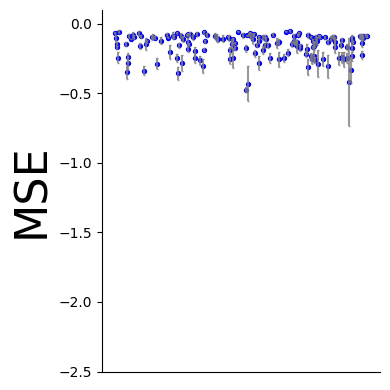

In [43]:
# set font size
title_font_size = 40
axis_font_size = 32
tick_font_size = 25
legend_font_size = 25

layer_short = "conv5"
sampling_type = "random"
net_name = "alexnet"
pop_size_list = [2048, 512, 128, 32, 8]
pop_size = 64
num_of_pop_resampling = metadata_df_cosine["pop_resampling_id"].max()+1
num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
col_name= "score"
save_path_root = os.path.join(save_root, f"matching_improvment")
similarity_metric = "MSE"
os.makedirs(save_path_root, exist_ok=True)

# do the mean and sem by negleting np.nan values
mean_score_g1 =  metadata_df_cosine[(metadata_df_cosine["output_type"] == "best_gen_imgs_RF_masked") & \
                                (metadata_df_cosine["similarity_metric"]==similarity_metric) & (
                                metadata_df_cosine["layer_short"]==layer_short) & (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["pop_size"] == pop_size) & (
                                metadata_df_cosine["net_name"] == net_name)].groupby([
                                "trget_imge_name", 'pop_resampling_id', 'gen_rerun_id'])[col_name].mean().reset_index()
score_mean = mean_score_g1.groupby(['pop_resampling_id', "trget_imge_name"])[col_name].mean()
score_std = mean_score_g1.groupby([ 'pop_resampling_id', "trget_imge_name"])[col_name].std()


            
fig, ax = plt.subplots(figsize=(4, 4))
#x_jitter = np.random.randn(0, 13, len(score_mean))
x_jitter = np.random.random(len(score_mean))*7
ax.errorbar(x_jitter, score_mean, yerr=score_std, color='gray', capsize=1, ls='none', label=None, alpha=0.8)
ax.scatter(x_jitter, score_mean, marker='o', color='blue', label=None, s=8)
# add a band for the initial score (mean +- std)
# remove the xaixs
ax.set_xticks([])
ax.set_ylim([-2.5, .1])
ax.set_ylabel("MSE", fontsize=axis_font_size)
#ax.set_yticks([-150, -100, -50, 0])
#ax.set_yticklabels([-150, -100, -50, 0], fontsize=tick_font_size, rotation=45)
plt.tight_layout()


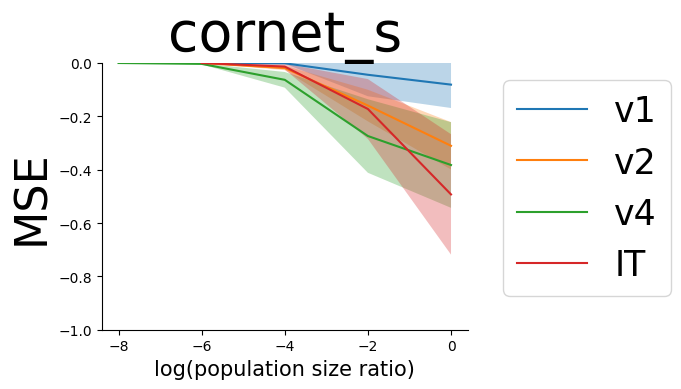

In [123]:
# set font size
title_font_size = 40
axis_font_size = 32
tick_font_size = 25
legend_font_size = 25
#layer_short_list = ["layer1", "layer2", "layer3", "layer4"]
#net_name = "resnet50_linf_8"

#layer_short_list = ["conv5", "conv4", "conv3", "conv2"]
#net_name = "alexnet"

layer_short_list = ["v1", "v2", "v4", "IT"]
net_name = "cornet_s"

sampling_type = "random"
pop_size = 512
num_of_pop_resampling = metadata_df_cosine["pop_resampling_id"].max()+1
num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
col_name= "score"
save_path_root = os.path.join(save_root, f"matching_improvment")

os.makedirs(save_path_root, exist_ok=True)
# do the mean and sem by negleting np.nan values
mean_score_g1 =  metadata_df_cosine[(metadata_df_cosine["output_type"] == "best_gen_imgs_RF_masked") & \
                                (metadata_df_cosine["similarity_metric"]==similarity_metric) &  (
                                metadata_df_cosine["sub_pop_type"] == sampling_type)& (
                                metadata_df_cosine["net_name"] == net_name)].groupby([
                                "pop_size", "trget_imge_name", 'pop_resampling_id', 'gen_rerun_id', "layer_short"])[col_name].mean().reset_index()
score_mean = mean_score_g1.groupby(["pop_size", "layer_short"])[col_name].mean()
score_std = mean_score_g1.groupby(["pop_size", "layer_short"])[col_name].std()
# let merge the score_mean and score_std
score_mean = score_mean.reset_index()
score_std = score_std.reset_index()
merged_df = pd.merge(score_mean, score_std, on=['pop_size', 'layer_short'])

fig, ax = plt.subplots(figsize=(7, 4))
for ls in layer_short_list:
    layer_scores = merged_df[merged_df["layer_short"]==ls]
    pop_size = layer_scores["pop_size"].values
    pop_size_ratio = pop_size / pop_size.max()
    # make a logaritmic scale of the pop size in the base of 2
    pop_size_ratio = np.log(pop_size_ratio) / np.log(2)
    ax.plot(pop_size_ratio, layer_scores['score_x'], label=ls)
    # add a shaded area for the std
    ax.fill_between(pop_size_ratio, layer_scores['score_x']-layer_scores['score_y'], layer_scores['score_x']+layer_scores['score_y'], alpha=0.3)
ax.set_xlabel("log(population size ratio)", fontsize=15)
ax.set_ylabel("MSE", fontsize=axis_font_size)
# add legend outside the plot
ax.legend(fontsize=legend_font_size, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title(net_name, fontsize=title_font_size)
# add a band on -2.5 to -1.5
ax.fill_between([-8, 0], [-2.5]*2, [-1.5]*2, color='gray', alpha=0.3)
ax.set_ylim([-1, 0])
fig.tight_layout()
# save the figure

save_path = os.path.join(save_root, "compair_mse_pop_size_diffrnt_net")
os.makedirs(save_path, exist_ok=True)
# save the figure
plt.savefig(os.path.join(save_path, f"mse_pop_size_{net_name}_{sampling_type}.png"), dpi=300)

In [92]:
merged_df

,pop_size,layer_short,score_x,score_y
0,1,layer1,-9.540938e-08,2.420330e-07
1,2,layer2,-8.678622e-05,1.020552e-04
2,4,layer1,-3.259879e-03,2.487111e-03
3,4,layer3,-1.773115e-03,1.182300e-03
4,8,layer2,-1.724844e-02,8.804604e-03
5,8,layer4,-1.577603e-02,1.018155e-02
6,16,layer1,-7.696816e-02,4.375713e-02
7,16,layer3,-5.091962e-02,3.463423e-02
8,32,layer2,-1.267829e-01,5.727614e-02
9,32,layer4,-2.214913e-01,1.284468e-01
